In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.layers import BatchNormalization
from keras.layers import TimeDistributed
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/wind project/final data ERA5 24 hours.xlsx")

In [4]:
data


,# date,lat,lon,soil_temp,temp,solar_rd,u10,v10,soil_temp.1,temp.1,...,wind speed.3,Unnamed: 43,Unnamed: 44,solar_rd.4,u10.4,v10.4,soil_temp.5,temp.5,pressure.4,wind speed.4
0,2011-01-01,14.5,77.5,293.431,292.019,1.961410e+07,0.155315,1.399950,20.281,18.869,...,2.566997,NaN,NaN,1.961410e+07,0.155315,1.399950,20.281,18.869,95848.4,1.502179
1,2011-01-01,14.5,77.5,293.063,291.975,1.862650e-09,0.114499,1.303050,19.913,18.825,...,3.115833,NaN,NaN,1.862650e-09,0.114499,1.303050,19.913,18.825,95901.0,1.064268
2,2011-01-01,14.5,77.5,293.102,292.538,1.086020e+05,-0.272937,1.208260,19.952,19.388,...,3.408713,NaN,NaN,1.086020e+05,-0.272937,1.208260,19.952,19.388,95997.9,0.747660
3,2011-01-01,14.5,77.5,295.555,295.004,8.415560e+05,-0.401350,1.049350,22.405,21.854,...,3.495023,NaN,NaN,8.415560e+05,-0.401350,1.049350,22.405,21.854,96101.7,0.779042
4,2011-01-01,14.5,77.5,299.023,297.310,2.294920e+06,-0.516890,0.721392,25.873,24.160,...,3.752448,NaN,NaN,2.294920e+06,-0.516890,0.721392,25.873,24.160,96141.0,1.262038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95684,2021-11-30,14.5,77.5,295.158,294.168,1.327630e+07,-2.551080,NaN,22.008,21.018,...,NaN,NaN,NaN,1.327630e+07,-2.551080,NaN,22.008,21.018,NaN,NaN
95685,2021-11-30,14.5,77.5,295.109,294.074,1.327630e+07,-2.560500,NaN,21.959,20.924,...,NaN,NaN,NaN,1.327630e+07,-2.560500,NaN,21.959,20.924,NaN,NaN
95686,2021-11-30,14.5,77.5,295.131,294.094,1.327630e+07,-2.294890,NaN,21.981,20.944,...,NaN,NaN,NaN,1.327630e+07,-2.294890,NaN,21.981,20.944,NaN,NaN
95687,2021-11-30,14.5,77.5,295.089,294.012,1.327630e+07,-2.214200,NaN,21.939,20.862,...,NaN,NaN,NaN,1.327630e+07,-2.214200,NaN,21.939,20.862,NaN,NaN


In [5]:
df3h=data[["temp.2",'soil_temp.2','solar_rd.1','pressure.1','u10.1','v10.1',"wind speed.1"]]

In [6]:
df3h

,temp.2,soil_temp.2,solar_rd.1,pressure.1,u10.1,v10.1,wind speed.1
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,1.123484
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,0.887458
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,0.636728
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,0.922119
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,1.553067
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,2.214200
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,2.057840
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [7]:
df3h=df3h[:90000]

In [8]:
df3h.describe()

,temp.2,soil_temp.2,solar_rd.1,pressure.1,u10.1,v10.1,wind speed.1
count,90000.000000,90000.000000,9.000000e+04,90000.000000,90000.000000,90000.000000,90000.000000
mean,26.931202,29.515442,1.444083e+07,95947.575214,0.739724,0.222411,3.202760
std,4.775821,6.720845,8.239108e+06,327.585181,3.256255,1.226050,1.563794
min,12.844000,15.024000,1.862650e-09,94864.100000,-7.145060,-6.181590,0.011003
25%,23.611000,24.697000,7.611002e+06,95699.500000,-2.160270,-0.624168,2.050907
50%,26.443000,28.004000,1.626740e+07,95935.200000,0.334119,0.336138,3.038441
75%,29.953000,32.925000,2.121330e+07,96194.500000,3.672690,1.103350,4.167724
max,41.062000,53.178000,2.793320e+07,97050.100000,10.352300,6.817320,10.352305


In [9]:
df3h.isnull().sum()

,0
temp.2,0
soil_temp.2,0
solar_rd.1,0
pressure.1,0
u10.1,0
v10.1,0
wind speed.1,0


In [10]:
x=df3h.iloc[:,:-1]
y=df3h.iloc[:,-1:]

In [11]:
x

,temp.2,soil_temp.2,solar_rd.1,pressure.1,u10.1,v10.1
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392
...,...,...,...,...,...,...
89995,28.539,30.224,2.664550e+07,96100.9,-1.218290,1.445450
89996,27.429,29.224,2.664550e+07,96033.7,-0.356766,1.823630
89997,26.702,28.486,2.664550e+07,95951.3,0.283099,1.986080
89998,25.731,27.599,2.664550e+07,95884.4,1.402390,2.070490


In [12]:
y

,wind speed.1
0,1.123484
1,0.887458
2,0.636728
3,0.922119
4,1.553067
...,...
89995,2.500725
89996,2.794666
89997,2.847885
89998,2.462561


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

In [14]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [15]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [16]:
x_train_scaled.shape

(63000, 6)

In [17]:
def create_sequence(dataset, length):
    data_sequences = []
    for index in range(len(dataset) - length):
        data_sequences.append(dataset[index: index + length])
    return np.asarray(data_sequences)

In [18]:
x_train_scaled = create_sequence(x_train_scaled, 1)
x_test_scaled  = create_sequence(x_test_scaled, 1)
y_train = y_train[-x_train_scaled.shape[0]:]
y_test  = y_test[-x_test_scaled.shape[0]:]

In [19]:
x_train_scaled.shape[:]

(62999, 1, 6)

In [20]:

model = Sequential()

# First LSTM layer
model.add(LSTM(64, input_shape=(x_train_scaled.shape[1:]), activation='tanh', return_sequences=True))
model.add(BatchNormalization())  # Moved BatchNormalization before Dropout
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(128, activation='tanh', return_sequences=True))  # Set return_sequences=True for deeper LSTMs
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Slightly higher dropout to regularize


# Fourth LSTM layer
model.add(LSTM(128, activation='tanh'))  # Last LSTM layer does not need return_sequences
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer and a small learning rate
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 258,177 (1008.50 KB)

 Trainable params: 257,537 (1006.00 KB)

 Non-trainable params: 640 (2.50 KB)

In [23]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,batch_size=512)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 1.7361 - mean_absolute_error: 1.7361 - val_loss: 2.7612 - val_mean_absolute_error: 2.7612
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.0423 - mean_absolute_error: 1.0423 - val_loss: 2.5771 - val_mean_absolute_error: 2.5771
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9462 - mean_absolute_error: 0.9462 - val_loss: 2.2123 - val_mean_absolute_error: 2.2123
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8958 - mean_absolute_error: 0.8958 - val_loss: 1.6163 - val_mean_absolute_error: 1.6163
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8615 - mean_absolute_error: 0.8615 - val_loss: 1.1428 - val_mean_absolute_error: 1.1428
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8239 - mean_absolute_error: 0.8239 - val_loss: 0.8196 - val_mean_absolute_error: 0.8196
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.8108 - mean_absolute_error: 0.8108 - 

In [24]:
predictions=model.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [25]:
mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6563 - mean_absolute_error: 0.6563
mean squared error 0.6375267505645752
mean absolute error 0.6375267505645752


In [26]:
rmse=math.sqrt(mse)
rmse

0.7984527228111726

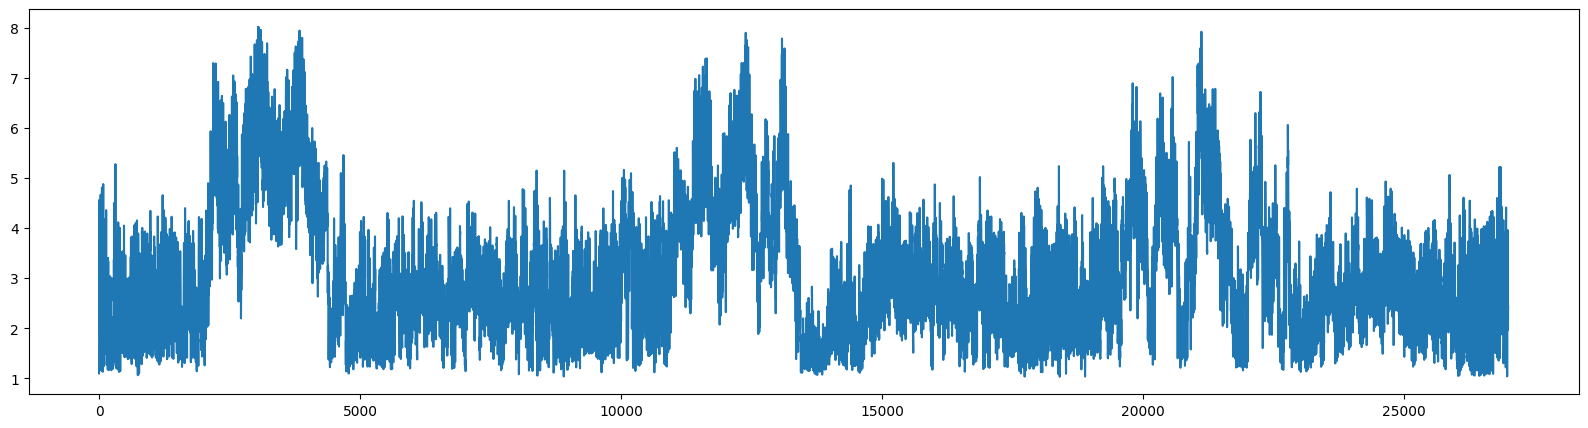

In [27]:
plt.figure(figsize=(20,5))
plt.plot(predictions)


In [28]:
#saving the values
pred3h=pd.DataFrame(predictions)
pred3h.to_csv('rnn prediction 3h.csv')
y_test.to_csv('rnn test_values 3h.csv')

In [29]:
with open('rnn3h.pickle','wb') as f3:
  pickle.dump(model,f3)

In [30]:
with open('rnn3h.pickle','rb') as f3:
  fm1=pickle.load(f3)

In [31]:
predictions3=fm1.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [32]:
mse=mean_squared_error(y_test,predictions3)
print("MSE:",mse)

mae=mean_absolute_error(y_test, predictions3)
print("MAE:",mae)

rmse=math.sqrt(mse)
print("RMSE :",rmse)

r2=r2_score(y_test,predictions3)
print("r2 coeffient :",r2)

MSE: 0.7073271379458214
MAE: 0.6375266523922604
RMSE : 0.8410274299604154
r2 coeffient : 0.7057691005350082


wind speed for next 6 hours

In [33]:
df6h=data[["temp.3",'soil_temp.3','solar_rd.2','pressure.2','u10.2','v10.2',"wind speed.2"]]

In [34]:
df6h

,temp.3,soil_temp.3,solar_rd.2,pressure.2,u10.2,v10.2,wind speed.2
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,0.922119
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,1.553067
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,1.851348
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,1.940464
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,1.946160
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,NaN
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,NaN
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [35]:
df6h=df6h[:90000]

In [36]:
x=df6h.iloc[:,:-1]
y=df6h.iloc[:,-1:]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

In [38]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [39]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [40]:
x_train_scaled = create_sequence(x_train_scaled, 1)
x_test_scaled  = create_sequence(x_test_scaled, 1)
y_train = y_train[-x_train_scaled.shape[0]:]
y_test  = y_test[-x_test_scaled.shape[0]:]

In [41]:
x_train_scaled.shape

(62999, 1, 6)

In [42]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,batch_size=512)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7433 - mean_absolute_error: 0.7433 - val_loss: 0.7039 - val_mean_absolute_error: 0.7039
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7112 - mean_absolute_error: 0.7112 - val_loss: 0.6992 - val_mean_absolute_error: 0.6992
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7030 - mean_absolute_error: 0.7030 - val_loss: 0.6975 - val_mean_absolute_error: 0.6975
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6957 - mean_absolute_error: 0.6957 - val_loss: 0.6986 - val_mean_absolute_error: 0.6986
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7007 - mean_absolute_error: 0.7007 - val_loss: 0.6956 - val_mean_absolute_error: 0.6956
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6944 - mean_absolute_error: 0.6944 - val_loss: 0.6995 - val_mean_absolute_error: 0.6995
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6925 - mean_absolute_error: 0.6925 - v

In [43]:
predictions6=model.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [44]:
mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7698 - mean_absolute_error: 0.7698
mean squared error 0.7510743737220764
mean absolute error 0.7510743737220764


In [45]:
rmse=math.sqrt(mse)
rmse

0.866645471759979

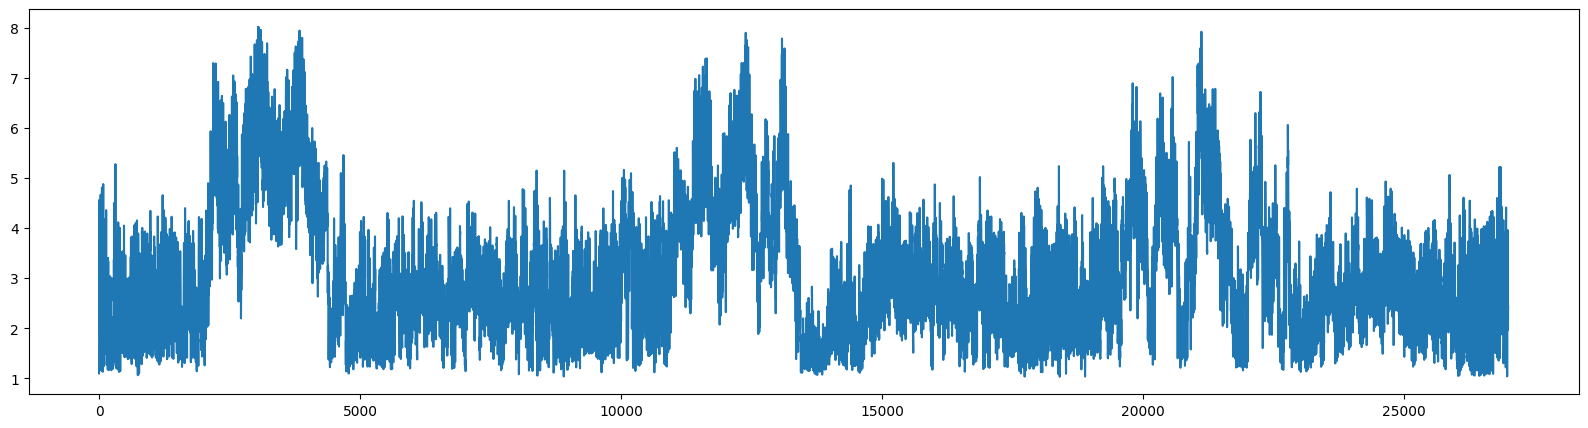

In [46]:
plt.figure(figsize=(20,5))
plt.plot(predictions)

In [47]:
#saving the values
pred6h=pd.DataFrame(predictions6)
pred6h.to_csv('rnn prediction 6h.csv')
y_test.to_csv('rnn test_values 6h.csv')

In [48]:
with open('rnn6h.pickle','wb') as f6:
  pickle.dump(model,f6)

In [49]:

with open('rnn6h.pickle','rb') as f6:
  fm6=pickle.load(f6)

In [50]:
predictions6=fm6.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [51]:
mse=mean_squared_error(y_test,predictions6)
print("MSE:",mse)

mae=mean_absolute_error(y_test, predictions6)
print("MAE:",mae)

rmse=math.sqrt(mse)
print("RMSE :",rmse)

r2=r2_score(y_test,predictions6)
print("r2 coeffient :",r2)

MSE: 0.9560690452016958
MAE: 0.7510747769879358
RMSE : 0.9777878324062412
r2 coeffient : 0.6022967947325144


12 hours wind prediction

In [52]:
df12h=data[["temp.4",'soil_temp.4','solar_rd.3','pressure.3','u10.3','v10.3',"wind speed.3"]]
df12h

,temp.4,soil_temp.4,solar_rd.3,pressure.3,u10.3,v10.3,wind speed.3
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,2.566997
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,3.115833
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,3.408713
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,3.495023
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,3.752448
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,NaN
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,NaN
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [53]:
df12h=df12h[:90000]
x=df12h.iloc[:,:-1]
y=df12h.iloc[:,-1:]

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

In [55]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [56]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [57]:
x_train_scaled = create_sequence(x_train_scaled, 1)
x_test_scaled  = create_sequence(x_test_scaled, 1)
y_train = y_train[-x_train_scaled.shape[0]:]
y_test  = y_test[-x_test_scaled.shape[0]:]

In [58]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,batch_size=512)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8516 - mean_absolute_error: 0.8516 - val_loss: 0.7687 - val_mean_absolute_error: 0.7687
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7544 - mean_absolute_error: 0.7544 - val_loss: 0.7592 - val_mean_absolute_error: 0.7592
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7428 - mean_absolute_error: 0.7428 - val_loss: 0.7498 - val_mean_absolute_error: 0.7498
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7315 - mean_absolute_error: 0.7315 - val_loss: 0.7507 - val_mean_absolute_error: 0.7507
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7346 - mean_absolute_error: 0.7346 - val_loss: 0.7501 - val_mean_absolute_error: 0.7501
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7313 - mean_absolute_error: 0.7313 - val_loss: 0.7458 - val_mean_absolute_error: 0.7458
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7305 - mean_absolute_error: 0.7305 - v

In [59]:
predictions12=model.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [60]:
mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

rmse=math.sqrt(mse)
rmse

844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.8057 - mean_absolute_error: 0.8057
mean squared error 0.7864565253257751
mean absolute error 0.7864565253257751


0.8868238412028485

In [61]:
#saving the values
pred12h=pd.DataFrame(predictions12)
pred12h.to_csv('rnn prediction 12h.csv')
y_test.to_csv('rnn test_values 12h.csv')

In [62]:
with open('rnn12h.pickle','wb') as f12:
  pickle.dump(model,f12)

In [63]:
with open('rnn12h.pickle','rb') as f12:
  fm12=pickle.load(f12)

In [64]:
predictions12=fm12.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [65]:
mse=mean_squared_error(y_test,predictions12)
print("MSE:",mse)

mae=mean_absolute_error(y_test, predictions12)
print("MAE:",mae)

rmse=math.sqrt(mse)
print("RMSE :",rmse)

r2=r2_score(y_test,predictions12)
print("r2 coeffient :",r2)

MSE: 1.0274011075375147
MAE: 0.78645565156577
RMSE : 1.0136079654074917
r2 coeffient : 0.5726337903421734


In [66]:
df24h=data[["temp.5",'soil_temp.5','solar_rd.4','pressure.4','u10.4','v10.4',"wind speed.4"]]
df24h


,temp.5,soil_temp.5,solar_rd.4,pressure.4,u10.4,v10.4,wind speed.4
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,1.502179
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,1.064268
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,0.747660
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,0.779042
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,1.262038
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,NaN
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,NaN
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [67]:

df24h=df24h[:90000]
x=df24h.iloc[:,:-1]
y=df24h.iloc[:,-1:]

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)


In [69]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [70]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [71]:

x_train_scaled = create_sequence(x_train_scaled, 1)
x_test_scaled  = create_sequence(x_test_scaled, 1)
y_train = y_train[-x_train_scaled.shape[0]:]
y_test  = y_test[-x_test_scaled.shape[0]:]

In [72]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,batch_size=512)


Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8908 - mean_absolute_error: 0.8908 - val_loss: 0.6981 - val_mean_absolute_error: 0.6981
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7036 - mean_absolute_error: 0.7036 - val_loss: 0.6815 - val_mean_absolute_error: 0.6815
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.6952 - mean_absolute_error: 0.6952 - val_loss: 0.6838 - val_mean_absolute_error: 0.6838
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.6823 - mean_absolute_error: 0.6823 - val_loss: 0.6752 - val_mean_absolute_error: 0.6752
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6768 - mean_absolute_error: 0.6768 - val_loss: 0.6801 - val_mean_absolute_error: 0.6801
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6790 - mean_absolute_error: 0.6790 - val_loss: 0.6759 - val_mean_absolute_error: 0.6759
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6757 - mean_absolute_error: 0.6757 - v

In [73]:
predictions=model.predict(x_test_scaled)


844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [74]:

mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

rmse=math.sqrt(mse)
rmse

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7278 - mean_absolute_error: 0.7278
mean squared error 0.7190853953361511
mean absolute error 0.7190853953361511


0.8479890301980039

In [75]:
pred24h=pd.DataFrame(predictions)

In [76]:
pred24h.to_csv("rnn predictions 24h.csv")
y_test.to_csv('rnn y_test 24h.csv')


In [77]:
with open('rnn24h.pickle','wb') as f24:
  pickle.dump(model,f24)


In [78]:
with open('rnn24h.pickle','rb') as f24:
  fm24=pickle.load(f24)

In [79]:
predictions24=fm24.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [80]:
mse=mean_squared_error(y_test,predictions24)
print("MSE:",mse)

mae=mean_absolute_error(y_test, predictions24)
print("MAE:",mae)

rmse=math.sqrt(mse)
print("RMSE :",rmse)

r2=r2_score(y_test,predictions24)
print("r2 coeffient :",r2)

MSE: 0.8559605556547323
MAE: 0.7190857093686451
RMSE : 0.9251813636551118
r2 coeffient : 0.6440224916765942
